In [133]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [134]:
data = open('poetry1.txt', 'r', encoding='utf-8').read()

In [135]:
tokenizer = Tokenizer()

In [136]:
sentences = data.split('\n')

In [137]:
print(len(sentences))

1692


In [138]:
tokenizer.fit_on_texts(sentences)

In [139]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [140]:
total_words = len(tokenizer.word_index) + 1
print(total_words)

2690


In [141]:
tmp_seq = tokenizer.texts_to_sequences(sentences[0:2])

In [142]:
print(tmp_seq)

[[51, 12, 96, 1217, 48, 2, 69], [2, 11, 15, 31, 361, 8, 24, 1218]]


In [143]:
def create_input_sentences(sentences):
    input_sentences = []
    for line in sentences:
        tokenized = tokenizer.texts_to_sequences([line])[0]
        for token_index in range(len(tokenized)):
            res = tokenized[0:token_index+1]
            print(res)
            input_sentences.append(res)
    return input_sentences

In [144]:
input_sentences = create_input_sentences(sentences)

[51]
[51, 12]
[51, 12, 96]
[51, 12, 96, 1217]
[51, 12, 96, 1217, 48]
[51, 12, 96, 1217, 48, 2]
[51, 12, 96, 1217, 48, 2, 69]
[2]
[2, 11]
[2, 11, 15]
[2, 11, 15, 31]
[2, 11, 15, 31, 361]
[2, 11, 15, 31, 361, 8]
[2, 11, 15, 31, 361, 8, 24]
[2, 11, 15, 31, 361, 8, 24, 1218]
[272]
[272, 798]
[272, 798, 2]
[272, 798, 2, 204]
[272, 798, 2, 204, 24]
[272, 798, 2, 204, 24, 579]
[272, 798, 2, 204, 24, 579, 69]
[118]
[118, 35]
[118, 35, 119]
[118, 35, 119, 799]
[118, 35, 119, 799, 56]
[118, 35, 119, 799, 56, 24]
[118, 35, 119, 799, 56, 24, 184]
[10]
[10, 184]
[10, 184, 25]
[10, 184, 25, 23]
[10, 184, 25, 23, 5]
[10, 184, 25, 23, 5, 580]
[10, 184, 25, 23, 5, 580, 456]
[2]
[2, 184]
[2, 184, 800]
[2, 184, 800, 12]
[2, 184, 800, 12, 801]
[2, 184, 800, 12, 801, 4]
[2, 184, 800, 12, 801, 4, 7]
[2, 184, 800, 12, 801, 4, 7, 235]
[1219]
[1219, 17]
[1219, 17, 12]
[1219, 17, 12, 75]
[1219, 17, 12, 75, 1220]
[1219, 17, 12, 75, 1220, 236]
[1219, 17, 12, 75, 1220, 236, 17]
[1219, 17, 12, 75, 1220, 236, 17, 12

[485, 243, 72, 124, 28, 2]
[485, 243, 72, 124, 28, 2, 87]
[485, 243, 72, 124, 28, 2, 87, 1320]
[485, 243, 72, 124, 28, 2, 87, 1320, 9]
[485, 243, 72, 124, 28, 2, 87, 1320, 9, 1321]
[2]
[2, 322]
[2, 322, 866]
[2, 322, 866, 31]
[2, 322, 866, 31, 211]
[2, 322, 866, 31, 211, 9]
[5]
[5, 1322]
[5, 1322, 3]
[5, 1322, 3, 108]
[5, 1322, 3, 108, 2]
[5, 1322, 3, 108, 2, 1323]
[5, 1322, 3, 108, 2, 1323, 175]
[5, 1322, 3, 108, 2, 1323, 175, 1]
[5, 1322, 3, 108, 2, 1323, 175, 1, 387]
[16]
[16, 1]
[16, 1, 221]
[16, 1, 221, 627]
[16, 1, 221, 627, 6]
[16, 1, 221, 627, 6, 65]
[16, 1, 221, 627, 6, 65, 11]
[16, 1, 221, 627, 6, 65, 11, 26]
[16, 1, 221, 627, 6, 65, 11, 26, 147]
[16, 1, 221, 627, 6, 65, 11, 26, 147, 9]
[16]
[16, 1]
[16, 1, 284]
[16, 1, 284, 6]
[16, 1, 284, 6, 1]
[16, 1, 284, 6, 1, 250]
[16, 1, 284, 6, 1, 250, 7]
[16, 1, 284, 6, 1, 250, 7, 22]
[16, 1, 284, 6, 1, 250, 7, 22, 2]
[16, 1, 284, 6, 1, 250, 7, 22, 2, 3]
[16, 1, 284, 6, 1, 250, 7, 22, 2, 3, 388]
[16, 1, 284, 6, 1, 250, 7, 22, 2, 3, 3

[52, 1]
[52, 1, 584]
[52, 1, 584, 108]
[52, 1, 584, 108, 2]
[52, 1, 584, 108, 2, 131]
[52, 1, 584, 108, 2, 131, 9]
[52, 1, 584, 108, 2, 131, 9, 8]
[52, 1, 584, 108, 2, 131, 9, 8, 493]
[881]
[881, 1349]
[881, 1349, 4]
[881, 1349, 4, 1]
[881, 1349, 4, 1, 199]
[881, 1349, 4, 1, 199, 639]
[881, 1349, 4, 1, 199, 639, 327]
[240]
[240, 104]
[240, 104, 223]
[240, 104, 223, 494]
[240, 104, 223, 494, 2]
[240, 104, 223, 494, 2, 1350]
[10]
[10, 5]
[10, 5, 1351]
[10, 5, 1351, 3]
[10, 5, 1351, 3, 82]
[10, 5, 1351, 3, 82, 4]
[10, 5, 1351, 3, 82, 4, 886]
[2]
[2, 1]
[2, 1, 494]
[2, 1, 494, 33]
[2, 1, 494, 33, 55]
[2, 1, 494, 33, 55, 11]
[2, 1, 494, 33, 55, 11, 48]
[2, 1, 494, 33, 55, 11, 48, 396]
[1]
[1, 1352]
[1, 1352, 495]
[1, 1352, 495, 11]
[1, 1352, 495, 11, 23]
[1, 1352, 495, 11, 23, 318]
[1, 1352, 495, 11, 23, 318, 370]
[2]
[2, 887]
[2, 887, 101]
[2, 887, 101, 243]
[2, 887, 101, 243, 23]
[2, 887, 101, 243, 23, 24]
[2, 887, 101, 243, 23, 24, 888]
[195]
[195, 256]
[195, 256, 4]
[195, 256, 4, 623]
[

[2, 29, 209, 916, 57, 658]
[14]
[14, 201]
[14, 201, 6]
[14, 201, 6, 5]
[14, 201, 6, 5, 832]
[14, 201, 6, 5, 832, 2]
[14, 201, 6, 5, 832, 2, 35]
[14, 201, 6, 5, 832, 2, 35, 39]
[14, 201, 6, 5, 832, 2, 35, 39, 103]
[14, 201, 6, 5, 832, 2, 35, 39, 103, 663]
[14, 201, 6, 5, 832, 2, 35, 39, 103, 663, 18]
[2]
[2, 15]
[2, 15, 13]
[2, 15, 13, 1]
[2, 15, 13, 1, 508]
[2, 15, 13, 1, 508, 6]
[2, 15, 13, 1, 508, 6, 58]
[2, 15, 13, 1, 508, 6, 58, 291]
[2, 15, 13, 1, 508, 6, 58, 291, 915]
[19]
[19, 18]
[19, 18, 1411]
[19, 18, 1411, 1412]
[19, 18, 1411, 1412, 18]
[19, 18, 1411, 1412, 18, 658]
[1]
[1, 579]
[1, 579, 6]
[1, 579, 6, 1413]
[1, 579, 6, 1413, 158]
[1, 579, 6, 1413, 158, 1414]
[1, 579, 6, 1413, 158, 1414, 29]
[1, 579, 6, 1413, 158, 1414, 29, 125]
[19]
[19, 3]
[19, 3, 121]
[19, 3, 121, 1]
[19, 3, 121, 1, 465]
[19, 3, 121, 1, 465, 6]
[19, 3, 121, 1, 465, 6, 25]
[19, 3, 121, 1, 465, 6, 25, 99]
[169]
[169, 509]
[169, 509, 4]
[169, 509, 4, 1]
[169, 509, 4, 1, 98]
[169, 509, 4, 1, 98, 38]
[169, 509

[27, 423, 4, 423, 2, 44, 1, 138]
[27, 423, 4, 423, 2, 44, 1, 138, 295]
[1]
[1, 410]
[1, 410, 124]
[1, 410, 124, 2]
[1, 410, 124, 2, 12]
[1, 410, 124, 2, 12, 1]
[1, 410, 124, 2, 12, 1, 401]
[1, 410, 124, 2, 12, 1, 401, 31]
[1, 410, 124, 2, 12, 1, 401, 31, 424]
[162]
[162, 11]
[162, 11, 162]
[162, 11, 162, 11]
[162, 11, 162, 11, 146]
[162, 11, 162, 11, 146, 50]
[162, 11, 162, 11, 146, 50, 2]
[162, 11, 162, 11, 146, 50, 2, 3]
[162, 11, 162, 11, 146, 50, 2, 3, 146]
[162, 11, 162, 11, 146, 50, 2, 3, 146, 1516]
[19]
[19, 51]
[19, 51, 96]
[19, 51, 96, 111]
[19, 51, 96, 111, 21]
[19, 51, 96, 111, 21, 410]
[19, 51, 96, 111, 21, 410, 8]
[19, 51, 96, 111, 21, 410, 8, 1]
[19, 51, 96, 111, 21, 410, 8, 1, 945]
[81]
[81, 21]
[81, 21, 1]
[81, 21, 1, 499]
[81, 21, 1, 499, 1517]
[81, 21, 1, 499, 1517, 2]
[81, 21, 1, 499, 1517, 2, 174]
[81, 21, 1, 499, 1517, 2, 174, 17]
[81, 21, 1, 499, 1517, 2, 174, 17, 289]
[162]
[162, 37]
[162, 37, 30]
[162, 37, 30, 425]
[162, 37, 30, 425, 8]
[162, 37, 30, 425, 8, 523

[685, 3, 900, 16, 32]
[685, 3, 900, 16, 32, 959]
[685, 3, 900, 16, 32, 959, 180]
[42]
[42, 4]
[42, 4, 686]
[42, 4, 686, 28]
[42, 4, 686, 28, 621]
[42, 4, 686, 28, 621, 2]
[42, 4, 686, 28, 621, 2, 960]
[42, 4, 686, 28, 621, 2, 960, 8]
[42, 4, 686, 28, 621, 2, 960, 8, 7]
[42, 4, 686, 28, 621, 2, 960, 8, 7, 215]
[64]
[64, 961]
[64, 961, 1558]
[64, 961, 1558, 1559]
[64, 961, 1558, 1559, 56]
[76]
[76, 1560]
[76, 1560, 99]
[76, 1560, 99, 30]
[76, 1560, 99, 30, 1561]
[76, 1560, 99, 30, 1561, 20]
[76, 1560, 99, 30, 1561, 20, 70]
[76, 1560, 99, 30, 1561, 20, 70, 833]
[76, 1560, 99, 30, 1561, 20, 70, 833, 76]
[76, 1560, 99, 30, 1561, 20, 70, 833, 76, 371]
[118]
[118, 185]
[118, 185, 1562]
[118, 185, 1562, 682]
[118, 185, 1562, 682, 20]
[118, 185, 1562, 682, 20, 25]
[118, 185, 1562, 682, 20, 25, 26]
[2]
[2, 263]
[2, 263, 1]
[2, 263, 1, 78]
[2, 263, 1, 78, 1563]
[2, 263, 1, 78, 1563, 209]
[2, 263, 1, 78, 1563, 209, 220]
[2, 263, 1, 78, 1563, 209, 220, 6]
[2, 263, 1, 78, 1563, 209, 220, 6, 7]
[2, 2

[1616]
[1616, 288]
[1616, 288, 5]
[1616, 288, 5, 642]
[1616, 288, 5, 642, 4]
[1616, 288, 5, 642, 4, 11]
[1616, 288, 5, 642, 4, 11, 100]
[1616, 288, 5, 642, 4, 11, 100, 532]
[695]
[695, 2]
[695, 2, 695]
[695, 2, 695, 2]
[695, 2, 695, 2, 695]
[695, 2, 695, 2, 695, 980]
[1617]
[1617, 1618]
[1617, 1618, 2]
[1617, 1618, 2, 1619]
[1617, 1618, 2, 1619, 1620]
[2]
[2, 1621]
[2, 1621, 981]
[2, 1621, 981, 8]
[2, 1621, 981, 8, 473]
[2, 1621, 981, 8, 473, 1622]
[214]
[214, 1623]
[214, 1623, 6]
[214, 1623, 6, 24]
[214, 1623, 6, 24, 1624]
[214, 1623, 6, 24, 1624, 2]
[214, 1623, 6, 24, 1624, 2, 396]
[214, 1623, 6, 24, 1624, 2, 396, 6]
[214, 1623, 6, 24, 1624, 2, 396, 6, 1625]
[1626]
[1626, 278]
[1626, 278, 38]
[1626, 278, 38, 1627]
[1626, 278, 38, 1627, 2]
[1626, 278, 38, 1627, 2, 1628]
[982]
[982, 2]
[982, 2, 1]
[982, 2, 1, 1629]
[982, 2, 1, 1629, 2]
[982, 2, 1, 1629, 2, 12]
[982, 2, 1, 1629, 2, 12, 38]
[982, 2, 1, 1629, 2, 12, 38, 1630]
[100]
[100, 532]
[100, 532, 1631]
[100, 532, 1631, 196]
[100, 5

[18, 431, 38]
[18, 431, 38, 1]
[18, 431, 38, 1, 387]
[18, 431, 38, 1, 387, 133]
[18, 431, 38, 1, 387, 133, 20]
[18, 431, 38, 1, 387, 133, 20, 202]
[18, 431, 38, 1, 387, 133, 20, 202, 20]
[18, 431, 38, 1, 387, 133, 20, 202, 20, 5]
[18, 431, 38, 1, 387, 133, 20, 202, 20, 5, 102]
[127]
[127, 6]
[127, 6, 1]
[127, 6, 1, 496]
[127, 6, 1, 496, 1861]
[127, 6, 1, 496, 1861, 14]
[127, 6, 1, 496, 1861, 14, 13]
[127, 6, 1, 496, 1861, 14, 13, 1862]
[14]
[14, 114]
[14, 114, 5]
[14, 114, 5, 1049]
[14, 114, 5, 1049, 714]
[14, 114, 5, 1049, 714, 110]
[14, 114, 5, 1049, 714, 110, 596]
[14, 114, 5, 1049, 714, 110, 596, 3]
[14, 114, 5, 1049, 714, 110, 596, 3, 1863]
[18]
[18, 1002]
[18, 1002, 1050]
[18, 1002, 1050, 1864]
[18, 1002, 1050, 1864, 32]
[18, 1002, 1050, 1864, 32, 1865]
[18, 1002, 1050, 1864, 32, 1865, 2]
[18, 1002, 1050, 1864, 32, 1865, 2, 319]
[21]
[21, 33]
[21, 33, 210]
[21, 33, 210, 40]
[21, 33, 210, 40, 69]
[21, 33, 210, 40, 69, 329]
[21, 33, 210, 40, 69, 329, 1866]
[21, 33, 210, 40, 69, 329

[2, 45, 40, 296, 2107, 4, 2108, 5, 112, 194, 303, 37, 62]
[2, 45, 40, 296, 2107, 4, 2108, 5, 112, 194, 303, 37, 62, 24]
[2, 45, 40, 296, 2107, 4, 2108, 5, 112, 194, 303, 37, 62, 24, 1116]
[282]
[282, 2109]
[282, 2109, 86]
[282, 2109, 86, 8]
[282, 2109, 86, 8, 1]
[282, 2109, 86, 8, 1, 564]
[282, 2109, 86, 8, 1, 564, 6]
[282, 2109, 86, 8, 1, 564, 6, 18]
[282, 2109, 86, 8, 1, 564, 6, 18, 203]
[2110]
[2110, 1]
[2110, 1, 43]
[2110, 1, 43, 1113]
[2110, 1, 43, 1113, 115]
[2110, 1, 43, 1113, 115, 173]
[2110, 1, 43, 1113, 115, 173, 2]
[2110, 1, 43, 1113, 115, 173, 2, 372]
[2110, 1, 43, 1113, 115, 173, 2, 372, 427]
[2110, 1, 43, 1113, 115, 173, 2, 372, 427, 1]
[2110, 1, 43, 1113, 115, 173, 2, 372, 427, 1, 764]
[2110, 1, 43, 1113, 115, 173, 2, 372, 427, 1, 764, 33]
[2110, 1, 43, 1113, 115, 173, 2, 372, 427, 1, 764, 33, 1004]
[40]
[40, 2111]
[40, 2111, 1117]
[40, 2111, 1117, 2112]
[40, 2111, 1117, 2112, 20]
[40, 2111, 1117, 2112, 20, 5]
[40, 2111, 1117, 2112, 20, 5, 581]
[33]
[33, 55]
[33, 55, 80]

[1, 572, 307, 26]
[1, 572, 307, 26, 668]
[1, 572, 307, 26, 668, 12]
[1, 572, 307, 26, 668, 12, 65]
[1158]
[1158, 86]
[1158, 86, 1]
[1158, 86, 1, 1156]
[1158, 86, 1, 1156, 130]
[1158, 86, 1, 1156, 130, 1]
[1158, 86, 1, 1156, 130, 1, 659]
[1158, 86, 1, 1156, 130, 1, 659, 1081]
[5]
[5, 1106]
[5, 1106, 10]
[5, 1106, 10, 1]
[5, 1106, 10, 1, 2335]
[5, 1106, 10, 1, 2335, 2]
[5, 1106, 10, 1, 2335, 2, 5]
[5, 1106, 10, 1, 2335, 2, 5, 2336]
[5, 1106, 10, 1, 2335, 2, 5, 2336, 10]
[5, 1106, 10, 1, 2335, 2, 5, 2336, 10, 1012]
[2]
[2, 5]
[2, 5, 2337]
[2, 5, 2337, 10]
[2, 5, 2337, 10, 189]
[2, 5, 2337, 10, 189, 34]
[2, 5, 2337, 10, 189, 34, 100]
[2, 5, 2337, 10, 189, 34, 100, 973]
[169]
[169, 4]
[169, 4, 2338]
[169, 4, 2338, 1]
[169, 4, 2338, 1, 189]
[169, 4, 2338, 1, 189, 34]
[169, 4, 2338, 1, 189, 34, 78]
[169, 4, 2338, 1, 189, 34, 78, 236]
[287]
[287, 24]
[287, 24, 253]
[287, 24, 253, 10]
[287, 24, 253, 10, 75]
[287, 24, 253, 10, 75, 110]
[287, 24, 253, 10, 75, 110, 339]
[1]
[1, 572]
[1, 572, 307]


[273, 198, 2, 69]
[273, 198, 2, 69, 20]
[273, 198, 2, 69, 20, 1]
[273, 198, 2, 69, 20, 1, 102]
[273, 198, 2, 69, 20, 1, 102, 6]
[273, 198, 2, 69, 20, 1, 102, 6, 1]
[273, 198, 2, 69, 20, 1, 102, 6, 1, 570]
[1187]
[1187, 1]
[1187, 1, 1197]
[1187, 1, 1197, 4]
[1187, 1, 1197, 4, 1193]
[1187, 1, 1197, 4, 1193, 23]
[1187, 1, 1197, 4, 1193, 23, 2537]
[965]
[965, 28]
[965, 28, 1]
[965, 28, 1, 705]
[965, 28, 1, 705, 48]
[965, 28, 1, 705, 48, 429]
[965, 28, 1, 705, 48, 429, 23]
[965, 28, 1, 705, 48, 429, 23, 2538]
[568]
[568, 92]
[568, 92, 1]
[568, 92, 1, 428]
[568, 92, 1, 428, 18]
[568, 92, 1, 428, 18, 2539]
[568, 92, 1, 428, 18, 2539, 1198]
[568, 92, 1, 428, 18, 2539, 1198, 1159]
[1199]
[1199, 2]
[1199, 2, 1153]
[1199, 2, 1153, 2]
[1199, 2, 1153, 2, 2540]
[1199, 2, 1153, 2, 2540, 2541]
[1200]
[1200, 2542]
[1200, 2542, 2543]
[1200, 2542, 2543, 2544]
[1201]
[1201, 1]
[1201, 1, 292]
[1201, 1, 292, 529]
[1201, 1, 292, 529, 1]
[1201, 1, 292, 529, 1, 292]
[1201, 1, 292, 529, 1, 292, 109]
[1201, 1, 2

In [145]:
sentences_length = [len(sentence) for sentence in input_sentences]
print(sentences_length)

[1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3,

In [146]:
max_length_for_pad = np.max(sentences_length)
print(max_length_for_pad)

16


In [147]:
padded_sequences = pad_sequences(input_sentences, maxlen=max_length_for_pad, padding='pre')
print(padded_sequences)

[[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  96]
 ...
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 138]
 [  0   0   0 ... 105 138 184]]


In [148]:
xs, labels = padded_sequences[:,0:-1],padded_sequences[:,-1]

In [149]:
labels

array([ 51,  12,  96, ..., 105, 138, 184])

In [150]:
xs

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,  51],
       [  0,   0,   0, ...,   0,  51,  12],
       ...,
       [  0,   0,   0, ...,   0,   0,  47],
       [  0,   0,   0, ...,   0,  47, 105],
       [  0,   0,   0, ...,  47, 105, 138]])

In [151]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) #one hot encoding here

In [152]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [153]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [154]:
print(xs[6])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]


In [155]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
   48]
[0. 0. 1. ... 0. 0. 0.]


In [156]:
print(len(ys[0]))

2690


In [157]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_length_for_pad-1)) #-1 cause we reduced with creating labels
model.add(Bidirectional(LSTM(150))) #we are using cell state here..
model.add(Dense(total_words, activation='softmax')) #one hot encoding result
adam = Adam(lr=0.01)

In [158]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [159]:
model.summary()

#embedding output discribing 100 dimensional vector for every word from sentence



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [160]:
history = model.fit(xs, ys, epochs=40, verbose=1)

Epoch 1/40
430/430 [==============================] - 16s 29ms/step - loss: 6.6840 - accuracy: 0.0630
Epoch 2/40
430/430 [==============================] - 12s 28ms/step - loss: 5.6079 - accuracy: 0.1183
Epoch 3/40
430/430 [==============================] - 14s 33ms/step - loss: 4.7489 - accuracy: 0.16120s - loss: 4.7460 - accu
Epoch 4/40
430/430 [==============================] - 14s 33ms/step - loss: 3.8752 - accuracy: 0.2439
Epoch 5/40
430/430 [==============================] - 13s 30ms/step - loss: 3.1751 - accuracy: 0.3403
Epoch 6/40
430/430 [==============================] - 12s 29ms/step - loss: 2.6868 - accuracy: 0.4227
Epoch 7/40
430/430 [==============================] - 13s 29ms/step - loss: 2.2387 - accuracy: 0.5090
Epoch 8/40
430/430 [==============================] - 13s 29ms/step - loss: 1.9127 - accuracy: 0.5730
Epoch 9/40
430/430 [==============================] - 14s 32ms/step - loss: 1.7371 - accuracy: 0.6222
Epoch 10/40
430/430 [==============================] - 13s

In [161]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

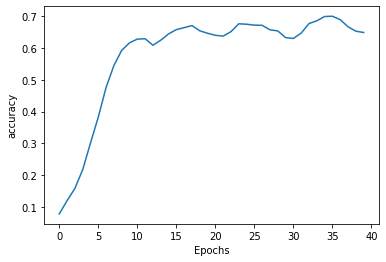

In [162]:
plot_graphs(history, 'accuracy')

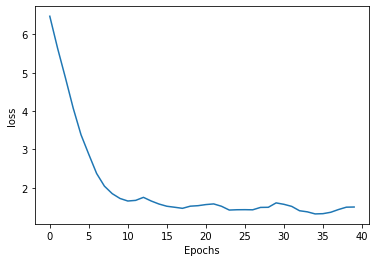

In [163]:
plot_graphs(history, 'loss')

In [172]:
seed_text = "I only got fucked in the but"
next_words = 200
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_length_for_pad-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    index_max_prob = np.argmax(predicted)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == index_max_prob:
            output_word = word
            break
    seed_text += " " + output_word

In [173]:
seed_text

'I only got fucked in the but a colleen sweet voice of the fathers yore my love eyes gone gone gone gone gone gone gone gone gone gone gone gone now i love in the juice of the barley and the bran rie pigs guineas love gone gone gone gone gone gone gone by the weirs of the town of kilkee and kilrush can sit and sport and gone gone gone gone gone gone gone gone gone gone ill gone and in love and by in carrigfergus bay as you died for your eyes may gone gone i love gone gone gone gone gone gone gone now gone and in her woods gone the old head is spinning bright may morning wind is gone gone gone gone grow gone gone gone gone gone your love from me reminded i well peeled today and fair prince edward isle they gone gone gone gone gone gone gone gone gone gone and gone and always gone alas it was to none but me boy in the gone for gone gone for gone gone gone alas there were gone gone and gone and the sea may gone alas it if lovely eyes were for your love for gone gone gone and'